<a href="https://colab.research.google.com/github/udayameister/linux/blob/main/simulated_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install nilearn --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 50.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 54.9 MB/s eta 0:00:00


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[GroupSparseCovarianceCV.fit] [GroupSparseCovarianceCV] Done refinement  1 out of 4


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[GroupSparseCovarianceCV.fit] [GroupSparseCovarianceCV] Done refinement  2 out of 4


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[GroupSparseCovarianceCV.fit] [GroupSparseCovarianceCV] Done refinement  3 out of 4


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.6s finished
/usr/local/lib/python3.9/dist-packages/nilearn/connectome/group_sparse_cov.py:245: UserWarning: input signals do not all have unit variance. This can lead to numerical instability.
  warnings.warn("input signals do not all have unit variance. This "
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[GroupSparseCovarianceCV.fit] [GroupSparseCovarianceCV] Done refinement  4 out of 4
[GroupSparseCovarianceCV.fit] Final optimization


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:   0s
[GraphicalLassoCV] Done refinement  2 out of 4:   0s
[GraphicalLassoCV] Done refinement  3 out of 4:   0s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[GraphicalLassoCV] Done refinement  4 out of 4:   0s
[GraphicalLassoCV] Done refinement  1 out of 4:   0s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


[GraphicalLassoCV] Done refinement  2 out of 4:   0s
[GraphicalLassoCV] Done refinement  3 out of 4:   0s
[GraphicalLassoCV] Done refinement  4 out of 4:   0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:   0s
[GraphicalLassoCV] Done refinement  2 out of 4:   0s
[GraphicalLassoCV] Done refinement  3 out of 4:   0s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


[GraphicalLassoCV] Done refinement  4 out of 4:   0s


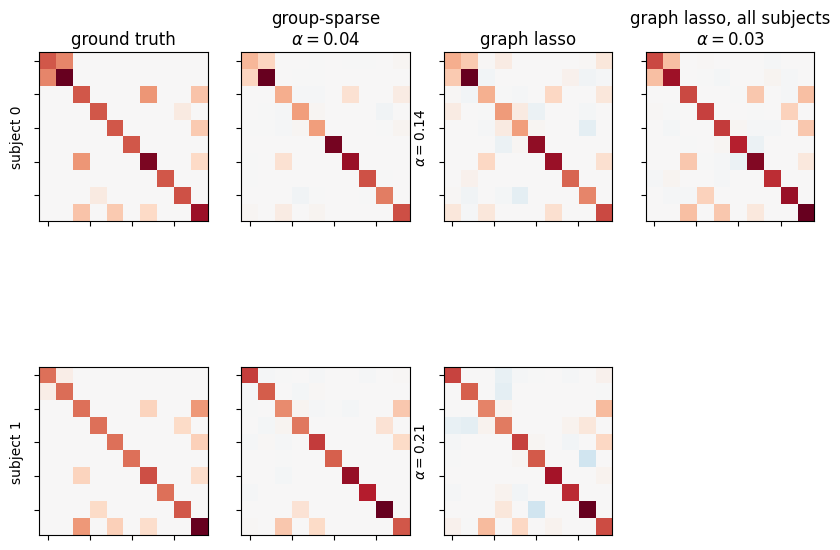

In [5]:

import matplotlib.pyplot as plt

# Generate synthetic data
from nilearn._utils.data_gen import generate_group_sparse_gaussian_graphs
from nilearn.plotting import show

n_subjects = 20  # number of subjects
n_displayed = 2 # number of subjects displayed
subjects, precisions, topology = generate_group_sparse_gaussian_graphs(
    n_subjects=n_subjects, n_features=10, min_n_samples=30, max_n_samples=50,
    density=0.1)

from nilearn import plotting
fig = plt.figure(figsize=(10, 7))
plt.subplots_adjust(hspace=0.4)
for n in range(n_displayed):
    ax = plt.subplot(n_displayed, 4, 4 * n + 1)
    max_precision = precisions[n].max()
    plotting.plot_matrix(precisions[n], vmin=-max_precision,
                         vmax=max_precision, axes=ax, colorbar=False)

    if n == 0:
        plt.title("ground truth")
    plt.ylabel("subject %d" % n)


# Run group-sparse covariance on all subjects
from nilearn.connectome import GroupSparseCovarianceCV
gsc = GroupSparseCovarianceCV(max_iter=50, verbose=1)
gsc.fit(subjects)

for n in range(n_displayed):
    ax = plt.subplot(n_displayed, 4, 4 * n + 2)
    max_precision = gsc.precisions_[..., n].max()
    plotting.plot_matrix(gsc.precisions_[..., n], axes=ax, vmin=-max_precision,
                         vmax=max_precision, colorbar=False)
    if n == 0:
        plt.title("group-sparse\n$\\alpha=%.2f$" % gsc.alpha_)


# Fit one graph lasso per subject
try:
    from sklearn.covariance import GraphicalLassoCV
except ImportError:
    # for Scitkit-Learn < v0.20.0
    from sklearn.covariance import GraphLassoCV as GraphicalLassoCV

gl = GraphicalLassoCV(verbose=1)

for n, subject in enumerate(subjects[:n_displayed]):
    gl.fit(subject)

    ax = plt.subplot(n_displayed, 4, 4 * n + 3)
    max_precision = gl.precision_.max()
    plotting.plot_matrix(gl.precision_, axes=ax, vmin=-max_precision,
                         vmax=max_precision, colorbar=False)
    if n == 0:
        plt.title("graph lasso")
    plt.ylabel("$\\alpha=%.2f$" % gl.alpha_)


# Fit one graph lasso for all subjects at once
import numpy as np
gl.fit(np.concatenate(subjects))

ax = plt.subplot(n_displayed, 4, 4)
max_precision = gl.precision_.max()
plotting.plot_matrix(gl.precision_, axes=ax, vmin=-max_precision,
                     vmax=max_precision, colorbar=False)
plt.title("graph lasso, all subjects\n$\\alpha=%.2f$" % gl.alpha_)

show()